In [59]:
import warnings
warnings.filterwarnings('ignore')

In [60]:
from fastai.text import *

In [61]:
import pandas as pd

In [62]:
path = "/content/drive/My Drive/fastai/NLP_kaggle"

In [63]:
df = pd.read_csv('/content/drive/My Drive/fastai/NLP_kaggle/train.csv')
df2 = pd.read_csv('/content/drive/My Drive/fastai/NLP_kaggle/test.csv')

In [64]:
df2.head(10)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


In [65]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [66]:
df_merge = pd.concat([df['text'] , df2['text']] , axis = 0)

In [67]:
df_merge.to_csv("/content/drive/My Drive/fastai/NLP_kaggle/merge.csv" , index = False)

 using
 DATA BLOCK API

In [68]:
bs = 36

In [69]:
data = (TextList.from_csv(path , 'merge.csv')
        .split_by_rand_pct(0.1)
        .label_for_lm()
        .databunch(bs = bs))
data.save('data_lm.pkl')

In [70]:
data = load_data(path , 'data_lm.pkl' , bs = bs)

In [71]:
data.show_batch()

idx,text
0,orders in xxmaj california xxbos xxmaj just got sent this photo from xxmaj xxunk # xxmaj alaska as smoke from # wildfires xxunk into a school xxbos # rockyfire xxmaj update = > xxmaj california xxmaj hwy . 20 closed in both xxunk due to xxmaj lake xxmaj county fire - # xxunk # wildfires xxbos # flood # disaster xxmaj heavy rain causes flash flooding of streets in xxmaj
1,/ xxunk http : / / t.co / xxunk xxbos xxup rt xxunk : # xxmaj love # xxunk # romance xxunk # xxmaj xxunk # xxunk # xxmaj xxunk # xxup xxunk # xxup xxunk 9 - 11 # apocalypse # xxmaj armageddon # xxunk _ xxbos / / i m gon na beat armageddon as xxmaj xxunk xxmaj xxunk xxrep 4 ? \n just got a xxunk
2,cut for xxunk _ http : / / t.co / xxunk xxbos # breakingnews http : / / t.co / xxunk fedex no longer willing to transport research specimens of potential xxunk _ http : / / t.co / xxunk xxbos fedex no longer to transport bioterror germs in wake of anthrax lab mishaps http : / / t.co / xxunk via @usatoday xxbos fedex stops shipping potential bioterror pathogens
3,up amirite xxbos xxmaj my xxunk just blown his xxunk up xxup ûò xxmaj bloody xxmaj xxunk xxmaj terrorist xxbos xxmaj turn on xxup xxunk and get blown up xxbos xxunk went down i was xxunk and blown up . xxmaj then next thing i know xxmaj xxunk xxmaj al xxmaj xxunk brought me back to life and i xxunk and for xxunk xxbos xxunk xxunk ass just got xxunk
4,wanted to watch xxmaj paper xxmaj xxunk but the buildings on fire xxrep 5 ? xxbos i hope the only time i end up on xxup tv is when i 'm being arrested for lighting buildings on fire . xxbos xxunk : xxmaj poland - work party xxunk in the xxmaj xxunk death camp xxmaj xxunk xxunk xxunk small arms and setting buildings on fire . # history xxbos xxmaj


In [72]:
learn = language_model_learner(data , AWD_LSTM , drop_mult = 0.3)

In [73]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


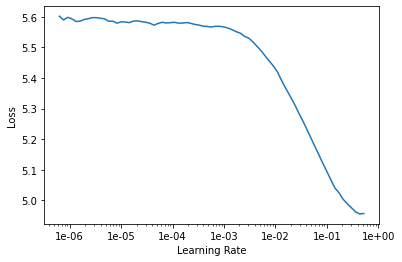

In [74]:
learn.recorder.plot(skip_end = 15)

In [75]:
learn.fit_one_cycle(5 , 5e-02 , moms = (0.8 , 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.740117,3.191731,0.439980,00:14
1,3.344515,3.145528,0.459127,00:14
2,2.961201,3.026368,0.479597,00:13
3,2.532293,2.958336,0.491667,00:13
4,2.213758,2.959214,0.494015,00:13


In [76]:
learn.save('fit_head')

In [83]:
learn.load('fit_head')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (9789 items)
x: LMTextList
xxbos xxmaj our xxmaj xxunk are the xxmaj reason of this # earthquake xxmaj may xxup allah xxmaj forgive us all,xxbos xxmaj forest fire near xxmaj la xxmaj xxunk xxmaj xxunk . xxmaj canada,xxbos xxmaj all residents asked to ' shelter in place ' are being xxunk by officers . xxmaj no other evacuation or shelter in place orders are expected,xxbos xxunk people receive # wildfires evacuation orders in xxmaj california,xxbos xxmaj just got sent this photo from xxmaj xxunk # xxmaj alaska as smoke from # wildfires xxunk into a school
y: LMLabelList
,,,,
Path: /content/drive/My Drive/fastai/NLP_kaggle;

Valid: LabelList (1087 items)
x: LMTextList
xxbos # xxmaj xxunk # xxmaj xxunk # xxmaj china xxunk to # xxmaj mudslide - hit # xxmaj xxunk http : / / t.co / xxunk,xxbos xxmaj the media needs to stop xxunk mass murder . xxmaj so many sick people want the eyes of the world and the media ... http : / / t.co / xxunk,x

In [84]:
learn.save('fine-tuned')

In [85]:
learn.load('fine-tuned')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (9789 items)
x: LMTextList
xxbos xxmaj our xxmaj xxunk are the xxmaj reason of this # earthquake xxmaj may xxup allah xxmaj forgive us all,xxbos xxmaj forest fire near xxmaj la xxmaj xxunk xxmaj xxunk . xxmaj canada,xxbos xxmaj all residents asked to ' shelter in place ' are being xxunk by officers . xxmaj no other evacuation or shelter in place orders are expected,xxbos xxunk people receive # wildfires evacuation orders in xxmaj california,xxbos xxmaj just got sent this photo from xxmaj xxunk # xxmaj alaska as smoke from # wildfires xxunk into a school
y: LMLabelList
,,,,
Path: /content/drive/My Drive/fastai/NLP_kaggle;

Valid: LabelList (1087 items)
x: LMTextList
xxbos # xxmaj xxunk # xxmaj xxunk # xxmaj china xxunk to # xxmaj mudslide - hit # xxmaj xxunk http : / / t.co / xxunk,xxbos xxmaj the media needs to stop xxunk mass murder . xxmaj so many sick people want the eyes of the world and the media ... http : / / t.co / xxunk,x

In [86]:
TEXT = 'the lightening'
n_words = 40
n_sen = 3

In [87]:
print("\n".join(learn.predict(TEXT , n_words , temperature= 0.75) for i in range(n_sen)))

the lightening rolling down in Jackson River in Jackson Service service . Sign - up damages all people who died in an airplane accident in the Silver Spring of 2013 . xxbos You now
the lightening struck in the skin of Israel xxbos # hot Funtenna : hijacking computers to send data as sound waves [ Black Hat 2015 ] http : / / t.co / qew4c5m1xd View and download video
the lightening struck in a war zone . Fire fighters are finally hungry xxbos It is not really important to me xxbos We 're shaking in # Hiroshima like it 's into a mass murder ... Or


In [88]:
learn.save_encoder('fine-tuned-enc')

CLASSIFIER

In [ ]:
df = df.iloc[: , 3:]
df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
df2 = df2.iloc[: , 3:]
df2.head()

,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
data_clas = TextClasDataBunch.from_df(path = path , train_df = df[:-1000] , valid_df = df[-1000:] , vocab = data.vocab , text_cols = 'text' , label_cols = 'target' , bs = 48 )
data_clas.save('data_clas.pkl')

In [ ]:
data_clas = load_data(path , 'data_clas.pkl' , bs = bs)

In [ ]:
data_clas.show_batch()

text,target
xxbos _ \n xxrep 5 ? xxup retweet \n xxrep 7 ? \n xxrep 5 ? xxup follow xxup all xxup who xxup rt \n xxrep 7 ? \n xxrep 5 ? xxup xxunk \n xxrep 7 ? \n xxrep 5 ? xxup gain xxup with \n xxrep 7 ? \n xxrep 5 ? xxup follow ? xxunk # xxup xxunk,0
xxbos . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : xxup rt xxunk : # xxunk \n \n xxmaj indian xxmaj army xxunk _ http : / / t.co / xxunk g,0
xxbos xxup info xxup r. xxup curfew xxup in xxup oper xxup until 2030 xxup z. xxup taxiways xxup foxtrot 5 & & xxup foxtrot 6 xxup navbl . xxup wnd : xxunk / 5 . xxup exp xxup inst xxup apch . xxup rwy 05 . xxup xxunk . xxup tmp : 10 . xxup xxunk : xxunk .,0
xxbos xxmaj learn xxmaj how i xxmaj gained xxmaj access xxmaj to xxmaj the xxmaj secrets xxmaj of xxmaj the xxmaj top xxmaj earners & & xxmaj used xxmaj them xxmaj to xxmaj explode xxmaj my xxmaj home xxmaj business xxmaj here : http : / / t.co / xxunk xxmaj please # xxup rt,0
xxbos xxmaj xxunk xxmaj hot xxmaj deals # xxunk > > http : / / t.co / xxunk xxunk xxup xxunk xxup xxunk xxup xxunk xxup led xxmaj work xxmaj light xxup flood xxmaj lamp xxmaj tractor xxmaj truck xxup suv xxup xxunk xxup aû _ http : / / t.co / xxunk,0


In [ ]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine-tuned-enc')

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


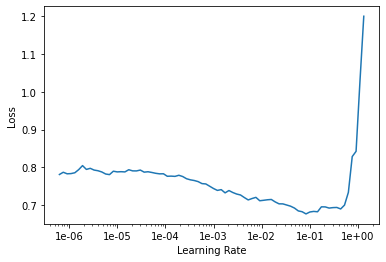

In [ ]:
learn.recorder.plot()

In [ ]:
learn.save('first')

In [ ]:
learn.load('first')

In [ ]:
learn.freeze_to(-2)

In [ ]:
learn.fit_one_cycle(2 , slice(1e-02/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.530737,0.468765,0.784000,00:13
1,0.479881,0.435493,0.803000,00:13


In [ ]:
learn.save('second')

In [ ]:
learn.load('second')

In [ ]:
learn.freeze_to(-3)
learn.fit_one_cycle(2 , slice(1e-03/(2.6**4),1e-03), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.441895,0.432656,0.810000,00:23
1,0.428019,0.434125,0.808000,00:21


In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(1 , slice(1e-03/(2.6**4),1e-03) , moms = (0.8 , 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.431266,0.441434,0.809000,00:24


In [ ]:
learn.predict('Just happened a terrible car crash')

(Category tensor(0), tensor(0), tensor([0.7123, 0.2877]))

In [ ]:
learn.predict('Hey! How are you?')

(Category tensor(0), tensor(0), tensor([0.8634, 0.1366]))

In [ ]:
pred_class , pred_idx , outputs = learn.predict('Hey! How are you?')
learn.data.classes[to_data(pred_class)]

0

In [ ]:
test = pd.read_csv('/content/drive/My Drive/fastai/NLP_kaggle/test.csv')

In [ ]:
target = list()
for i in df2['text']:
  quote = str(i)
  pred_class , pred_idx , outputs = learn.predict(quote)
  prediction = learn.data.classes[to_data(pred_class)]
  target.append(prediction)
  print(len(target))

In [ ]:
target[:10]

[0, 1, 1, 1, 1, 1, 0, 0, 0, 0]

In [ ]:
prediction = test.loc[: , ['id']]

In [ ]:
prediction.head()

,id
0,0
1,2
2,3
3,9
4,11


In [ ]:
prediction['target'] = target

In [ ]:
prediction.head(10)

,id,target
0,0,0
1,2,1
2,3,1
3,9,1
4,11,1
5,12,1
6,21,0
7,22,0
8,27,0
9,29,0


In [ ]:
prediction.to_csv('/content/drive/My Drive/fastai/NLP_kaggle/prednlp2.csv' , index = False)